**Importing Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("Binary.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,target
0,-1.944044,1.891310,5.378017,-1.099764,0.319998,-0.107990,0.192998,-0.531588,-1.978358,0.505306,...,0.435838,-0.375777,-2.410484,1.307302,-0.447091,-1.205613,-0.758668,-1.115528,1.219782,1
1,0.548890,3.689146,-1.079215,-1.125497,6.892610,-0.114086,-0.129833,-4.471123,1.281707,2.509007,...,-0.515136,-1.814937,-0.659753,0.092014,1.173449,-0.887015,-0.657684,0.676340,0.379053,1
2,1.044743,2.804073,-1.779122,-0.358211,6.132624,-1.309396,-0.731316,-3.381683,-1.444734,3.028355,...,-0.928873,-1.592203,-0.389953,0.343527,0.740160,-0.244341,-1.337129,-0.168281,-0.464880,1
3,-2.848743,-2.220174,-0.498797,-0.054547,0.073406,0.927517,1.891807,-0.381548,0.017551,0.659493,...,0.662054,0.671306,-0.463003,-0.170516,0.249816,0.019505,-0.380889,-0.222127,0.364851,1
4,-0.715628,0.217362,2.032461,-0.144826,4.375660,-1.762026,1.335940,1.742721,-1.771379,0.819612,...,-0.428352,-0.511074,-0.346423,0.137622,-0.289325,-1.089344,-0.407556,-0.007071,0.117600,1


In [3]:
# Splitting features and target
X = df.drop(columns=['target'])  # Replace 'target' with actual target column name
y = df['target']

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression - Sklearn Library**

In [5]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1]

In [6]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.96      1.00      0.98        94

    accuracy                           0.96       109
   macro avg       0.98      0.87      0.91       109
weighted avg       0.96      0.96      0.96       109



In [7]:
# Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11  4]
 [ 0 94]]


In [8]:
# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Compute Sensitivity & Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity: 1.0000
Specificity: 0.7333


(array([0.5, 1.5]), [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')])

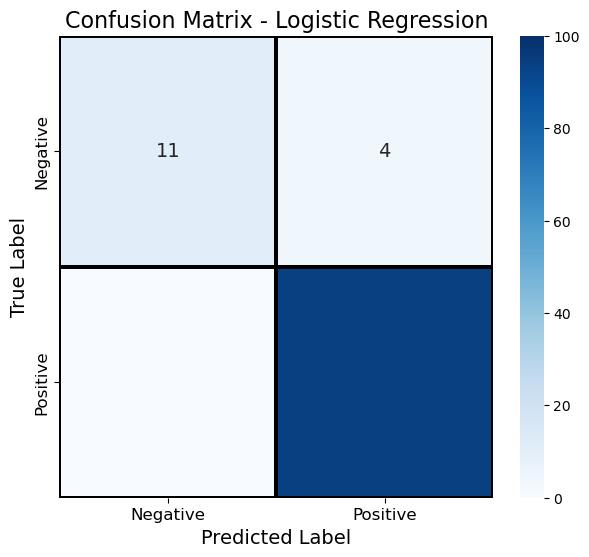

In [9]:
# Plot Confusion Matrix
plt.figure(figsize=(7,6))  # Increase figure size
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', 
                 linewidths=1.5, linecolor='black', 
                 annot_kws={"size": 14}, vmin=0, vmax=100,
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])


plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

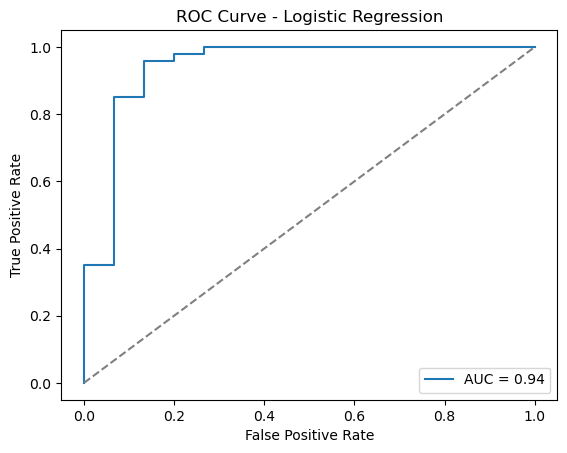

In [27]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

**Logistic Regression - Built From Scratch**

In [28]:
# Add bias term (column of ones)
X_train_1 = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_1 = np.c_[np.ones(X_test.shape[0]), X_test]

In [29]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize weights
        self.weights = np.zeros(X.shape[1])
        
        # Gradient Descent
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights)
            y_pred = self.sigmoid(linear_model)
            gradient = np.dot(X.T, (y_pred - y)) / y.size
            self.weights -= self.lr * gradient
    
    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights))

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [30]:
# Train Logistic Regression from scratch
log_reg = LogisticRegressionScratch(lr=0.01, epochs=5000)
log_reg.fit(X_train_1, y_train)

In [31]:
# Predictions
y_pred_1 = log_reg.predict(X_test_1)
y_prob_1 = log_reg.predict_proba(X_test_1)

In [32]:
# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred_1):.2f}")
print(classification_report(y_test, y_pred_1))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.96      0.98      0.97        94

    accuracy                           0.94       109
   macro avg       0.90      0.86      0.88       109
weighted avg       0.94      0.94      0.94       109



In [33]:
# Evaluation Metrics
cm1 = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11  4]
 [ 0 94]]


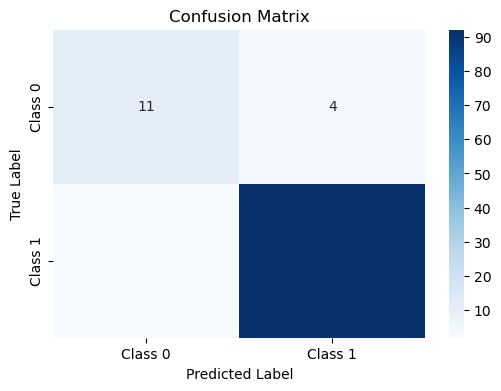

In [34]:

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

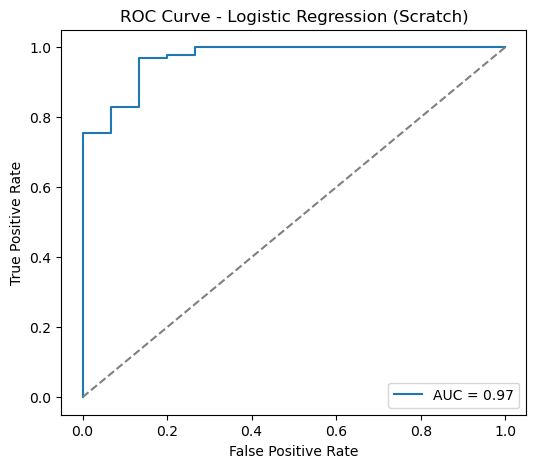

In [35]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Scratch)")
plt.legend()
plt.show()